In [2]:
from CartAndPole.QLearningTabular.Agent import Agent
from CartAndPole.QLearningTabular.DoubleQLearningPolicy import DoubleQLearningPolicy as Policy
from Core.Utility.EpsilonGreedyStrategy import EpsilonGreedyStrategy
from CartAndPole.QLearningTabular.EnvironmentManager import EnvironmentManager
from IPython.display import clear_output, display
from itertools import count
from Core.Utility.Helper import Helper
from Core.Utility.DecayingLearningRate import DecayingLearningRate
from Core.Utility.UCB import UCB 
import numpy as np

epsilon_start = 1
epsilon_end = 0.01
epsilon_decay = 0.001

initial_lr = 0.01
decay_rate = 0.000002
min_lr = 0.001

In [3]:
agent = Agent()
stateSpace = agent.initializeState()
epsilonGreedy = EpsilonGreedyStrategy(epsilon_start, epsilon_end, epsilon_decay)
decayingLearningRate = DecayingLearningRate(initial_lr, decay_rate, min_lr)
environment = EnvironmentManager('CartPole-v1')
policy = Policy() 
policy.initializePolicy(stateSpace, environment.actionSpace.n)
ucb = UCB(environment.actionSpace.n, len(stateSpace), .1)





numberOfEpisodes = 0
score = [0]
scoreCounter = 0
stateDict = dict(zip(stateSpace, range(len(stateSpace))))
for episode in range(numberOfEpisodes):
    stateHasChanged = True
        
    for step in count():
        
        currentState = agent.getState(environment.observation)
        action = epsilonGreedy.chooseAction(currentState, policy, episode)
        reward, terminated = environment.step(action)
        nextState = agent.getState(environment.observation)
        trainingReward = -10 if terminated else reward
        
        
        
        # selectionPolicy.train(currentState, nextState, reward, action, updatePolicy)

         
        
        
      
        
        scoreCounter += reward
        
        
        
        if terminated:
            
            score.append(scoreCounter)
            scoreCounter = 0
            environment.reset()
            
            if(episode % 200 == 0):
                clear_output(wait=True)
                display(f"episode {episode}")
                display(int(Helper.getMovingAverage3(300, score)))
                # utility.plot(300 ,score)
            
            break
        
       
            
            
environment.close()


In [11]:
environment = EnvironmentManager('CartPole-v1', True)

In [12]:
numberOfEpisodes = 15

for episode in range(numberOfEpisodes):
        
    for step in count():
        clear_output(wait=True)
        # display(f"step {episode}")
        currentState = agent.getState(environment.observation)
        
        action = policy1.getMaxAction(currentState)
        # action = policy.getRandomAction()
        reward, terminated = environment.step(action)
        nextState = agent.getState(environment.observation)
        
        
        
        if terminated:
            environment.reset()
            break
            
environment.close()

In [ ]:

s = []
for i, j in policy1.Q.items():
    if(max(j) > 0):
        s.append(f'{i} \t {j}')
        
print(len(s))

s
    


# import importlib
# ag = importlib.import_module("Utility")
# ag = importlib.reload(ag)


In [1]:
import gymnasium as gym
import numpy as np
env = gym.make('CartPole-v1')

state_low = env.observation_space.low
state_high = env.observation_space.high


n_bins = (4, 4, 4, 4)

tiler = gym.spaces.Box(low=state_low, high=state_high, dtype=np.float32)
    
print(tiler)
    


Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)


In [ ]:
# Create Feature Vector
import numpy as np

cartPositionSpace = np.linspace(-2.4, 2.4, 10)
cartVelocitySpace = np.linspace(-4, 4, 5)
poleAngleSpace = np.linspace(-0.20943951, 0.20943951, 5)
poleAngleVelocitySpace = np.linspace(-4, 4, 5)



In [6]:
import numpy as np
cartPositionMin, cartPositionMax = -2.4, 2.4
cartVelocityMin, cartVelocityMax = -3.0, 3.0
poleAngleMin, poleAngleMax = -0.20943951, 0.20943951
poleAngularVelocityMin, poleAngularVelocityMax = -4.0, 4.0

numPositionBin = 8
numVelocityBin = 8
numAngleBin = 8
numAngularVelocityBin = 8

# cartPositionBin = np.linspace(0, 10,  11)
# print(cartPositionBin)

def tiles(cartPosition, cartVelocity, poleAngle, poleAngularVelocity):
    tileIndices = []
    numTilings = 3
    
    cartPositionBin = np.linspace(cartPositionMin, cartPositionMax, numPositionBin + 1)
    cartVelocityBin = np.linspace(cartVelocityMin, cartVelocityMax, numVelocityBin + 1)
    poleAngleBin = np.linspace(poleAngleMin, poleAngleMax, numAngleBin + 1)
    poleAngularVelocityBin = np.linspace(poleAngularVelocityMin, poleAngularVelocityMax, numAngularVelocityBin + 1)
    
    
    
    for tiling in range(numTilings):
        cartPositionOverLappingUnit = tiling * (cartPositionMax - cartPositionMin) / (numPositionBin * numTilings)
        cartVelocityOverLappingUnit = tiling * (cartVelocityMax - cartVelocityMin) / (numVelocityBin * numTilings)
        poleAngleOverLappingUnit = tiling * (poleAngleMax - poleAngleMin) / (numAngleBin * numTilings)
        poleAngularVelocityOverLappingUnit = tiling * (poleAngularVelocityMax - poleAngularVelocityMin) / (numAngularVelocityBin * numTilings)
        
        
        
        
        
        
        cartPositionIndex = np.digitize(cartPosition, cartPositionBin + cartPositionOverLappingUnit)
        cartVelocityIndex = np.digitize(cartVelocity, cartVelocityBin + cartVelocityOverLappingUnit)
        poleAngleIndex = np.digitize(poleAngle, poleAngleBin + poleAngleOverLappingUnit)
        poleAngularVelocityIndex = np.digitize(poleAngularVelocity, poleAngularVelocityBin + poleAngularVelocityOverLappingUnit)
        
        tileIndex = (tiling * (numPositionBin + numVelocityBin + numAngleBin + numAngularVelocityBin)
                     + cartPositionIndex 
                     + cartVelocityIndex * numPositionBin
                     + poleAngleIndex * numPositionBin * numVelocityBin
                     + poleAngularVelocityIndex * numAngleBin * numPositionBin * numVelocityBin
                     )
        
        tileIndices.append(tileIndex)
        
        return tileIndices
    
    numWeights = numTilings * (numVelocityBin + numPositionBin + numAngleBin + numAngularVelocityBin)
    weights = np.zeros(numWeights)
    
    featureVector = np.zeros(numWeights)
    
#     feature_vector = np.zeros(num_weights)  # Initialize feature vector
# for tile_index in active_tiles:
#     feature_vector[tile_index] = 1 
    
    
        
        
        

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [67]:
import numpy as np

class LinearFunctionApproximator:
    def __init__(self, num_features, num_actions):
        
        self.num_features = num_features
        self.num_actions = num_actions
        
        self.weights = np.random.randn(num_actions, num_features)
        # self.bias = np.random.randn(num_features)
        
    def approximate(self, features):
        self.features = features
        self.QValue = np.dot(self.weights, features)
        # + self.bias
        return self.QValue
    
    def calcualteLoss(self, targetQValue):
        n = self.QValue.shape[0]
        m = self.QValue.shape[1]
        error = targetQValue - self.QValue
        return (1 / m) * np.sum( (1 / n) * (1/2) * np.square(np.sum(error, axis=0)), axis=0)
    
    def calculateGradient(self, targetQValue):
        error = targetQValue - self.QValue
        return np.dot(error, self.features.T)
    
    def updateWeights(self, targetQValue, learningRate=0.01):
        gradient = self.calculateGradient(targetQValue)
        self.weights = self.weights - learningRate * gradient
        return self.weights
        
        
        
    
    

In [47]:


lfa = LinearFunctionApproximator(5, 1)
# shape of features = 5 by 1
features = np.array([[1, 33],[2, 21],[3, 34],[4, 32],[5, 34]])

actionQValues = lfa.approximate(features)
# shape of actionQValue = 2 by 1
nextQValues = np.array([[3],[4]])
# shape of nextQValues = 2 by 1
reward = 10
discount = .9
targetQValue = reward + discount * nextQValues
QValues = lfa.calcualteLoss(targetQValue)
print(features.shape)
print(actionQValues.shape)
print(QValues.shape)
# shape of QValues = 2 by 1



(5, 2)
(1, 2)
(2,)


In [65]:
import numpy as np
y = np.linspace(0,4000,2001, dtype=np.float16)
X = np.array([[x * 2,
      np.random.rand(),
      np.random.rand(),
      np.random.rand(),
      np.random.rand(),
      ] for x in y], dtype=np.float16)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)


      



In [68]:
lfa = LinearFunctionApproximator(5, 1)
# shape of features = 5 by 1
features = X_train.T
target = np.expand_dims(y_train, -1).T
# t = lfa.approximate(features)
# t.shape
lossHistory = []


for i in range(2000):
     
    lfa.approximate(features)
    loss = lfa.calcualteLoss(target)
    lossHistory.append(loss)
    lfa.updateWeights(target)
    print(loss)
    

1463967.7720211805
1.4593306821482524e+23
1.454708348388788e+40
1.4501006555668787e+57
1.445507557308314e+74
1.4409290073857776e+91
1.4363649597183756e+108
1.4318153683711704e+125
1.4272801875547155e+142
1.4227593716246125e+159
1.4182528750810247e+176
1.4137606525682407e+193
1.4092826588742068e+210
1.4048188489300818e+227
1.4003691778097705e+244
1.395933600729481e+261
1.3915120730472678e+278
1.3871045502625907e+295
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
n

/tmp/ipykernel_306563/3673148800.py:22: RuntimeWarning: overflow encountered in square
  return (1 / m) * np.sum( (1 / n) * (1/2) * np.square(np.sum(error, axis=0)), axis=0)


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


shape of f is 10:1
shape of w is 2:10
shape of q = 2:1

q = w.f = 2:10 . 10:1 = 2:1

error = qpred - qtrue = 2:1
dw = error . f.T = 2:1 . 1:10 = 2:10


In [54]:
X_train.T.shape

(5, 1500)

In [18]:
import tensorflow as tf
inputDim = 5
outputDim = 1

model = tf.keras.Sequential([
    # tf.keras.layers.Input(shape=(inputDim,)),
    tf.keras.layers.Dense(outputDim, activation='linear', input_shape=(inputDim,))
])

lossFn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
model.compile(loss=lossFn, optimizer=optimizer)

# create the training and testing data
import numpy as np
y = np.linspace(0,4000,2001, dtype=np.float16)
X = np.array([[x * 2,
      np.random.rand(),
      np.random.rand(),
      np.random.rand(),
      np.random.rand(),
      ] for x in y], dtype=np.float16)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)
history = model.fit(X_train, y_train, epochs=5000, verbose=2)

# X = np.

Epoch 1/5000
47/47 - 1s - 12ms/step - loss: 2.3107
Epoch 2/5000
47/47 - 0s - 4ms/step - loss: 2.2798
Epoch 3/5000
47/47 - 0s - 4ms/step - loss: 2.2512
Epoch 4/5000
47/47 - 0s - 3ms/step - loss: 2.2224
Epoch 5/5000
47/47 - 0s - 4ms/step - loss: 2.2088
Epoch 6/5000
47/47 - 0s - 4ms/step - loss: 2.1895
Epoch 7/5000
47/47 - 0s - 4ms/step - loss: 2.1387
Epoch 8/5000
47/47 - 0s - 3ms/step - loss: 2.0968
Epoch 9/5000
47/47 - 0s - 3ms/step - loss: 2.0702
Epoch 10/5000
47/47 - 0s - 3ms/step - loss: 2.0357
Epoch 11/5000
47/47 - 0s - 3ms/step - loss: 2.0015
Epoch 12/5000
47/47 - 0s - 4ms/step - loss: 1.9990
Epoch 13/5000
47/47 - 0s - 4ms/step - loss: 1.9524
Epoch 14/5000
47/47 - 0s - 3ms/step - loss: 1.9108
Epoch 15/5000
47/47 - 0s - 3ms/step - loss: 1.8715
Epoch 16/5000
47/47 - 0s - 3ms/step - loss: 1.8471
Epoch 17/5000
47/47 - 0s - 3ms/step - loss: 1.8087
Epoch 18/5000
47/47 - 0s - 2ms/step - loss: 1.7749
Epoch 19/5000
47/47 - 0s - 2ms/step - loss: 1.7380
Epoch 20/5000
47/47 - 0s - 3ms/step - l

In [22]:
prediction = model.predict(X_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [ ]:
ind = 2
for i in range(40):
    print(prediction[ind+i][0], y_test[ind+i])
# print(y_test[ind])

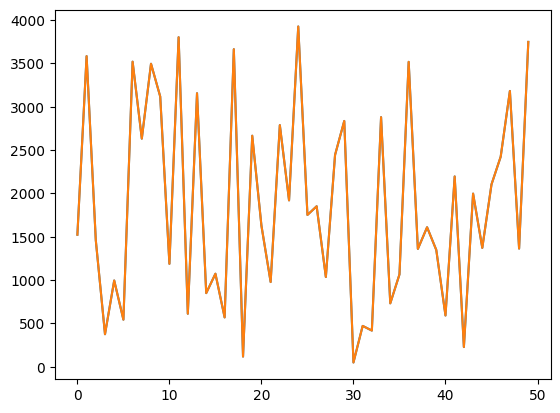

In [36]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(prediction[0:50, 0])
plt.plot(y_test[0:50])
plt.show()

In [ ]:


# # np.array((numX, numY))
# numX = 4
# numY = 5
# numZ = 3

# def getUnit(x, y, z):
#     return x + numX * y + z * numX * numY

# for z in range(numZ):
#     for y in range(numY):
#         for x in range(numX):
        
#             print(f'x : {x} \t y : {y} \t z : {z} \t unit : {getUnit(x, y, z)}')

